# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Conectando ao banco de dados 'sinasc_RO_2019.csv'
sinasc = pd.read_csv('sinasc_RO_2019.csv')

In [3]:
# Visualizando DataFrame 'sinasc'
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
# Visualizando informação do DataFrame 'sinasc'
sinasc['APGAR5'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27028 entries, 0 to 27027
Series name: APGAR5
Non-Null Count  Dtype  
--------------  -----  
26925 non-null  float64
dtypes: float64(1)
memory usage: 211.3 KB


Há registro de valores 'Missing' na coluna APGAR5. Vamos analisá-los para definir a forma de higienização da base de dados.

In [5]:
# Procurando por valores Missing
apgar5_na = sinasc['APGAR5'].isna().sum() # Totalizando os valores Missing
apgar5, = sinasc['APGAR5'].shape # Totalizando os valores em apgar5
part_apgar5 = 100 * apgar5_na / apgar5 # Calculando a representavidade dos valores missing
print("Os valores 'Missing' representam ", round(part_apgar5, 2), "% de todos os registros de APGAR5!")

Os valores 'Missing' representam  0.38 % de todos os registros de APGAR5!


In [6]:
# Excluindo os valores 'Missing' da coluna APGAR5
sinasc.dropna(subset = 'APGAR5', inplace = True)
# conte novamente o número de linhas e o número de missings
sinasc_na = pd.DataFrame(sinasc[['APGAR5']].isna().sum(), columns=['Total de valores missing']).transpose()
apgar5, = sinasc['APGAR5'].shape
print('número de registros: ',apgar5)
sinasc_na

número de registros:  26925


,APGAR5
Total de valores missing,0


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [7]:
# Categorização da variável APGAR5
dict_map = {
    0: 'asfixia grave', 1: 'asfixia grave', 2: 'asfixia grave', 3: 'asfixia grave',
    4: 'asfixia moderada', 5: 'asfixia moderada', 
    6: 'asfixia leve', 7: 'asfixia leve',
    8: 'normal', 9: 'normal', 10: 'normal'
}

sinasc['APGAR5_CAT'] = sinasc['APGAR5'].map(dict_map) # Utilizando a função 'map' da pandas para a categorização
sinasc.head() # Visualizando novamente o DataFrame

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_CAT
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

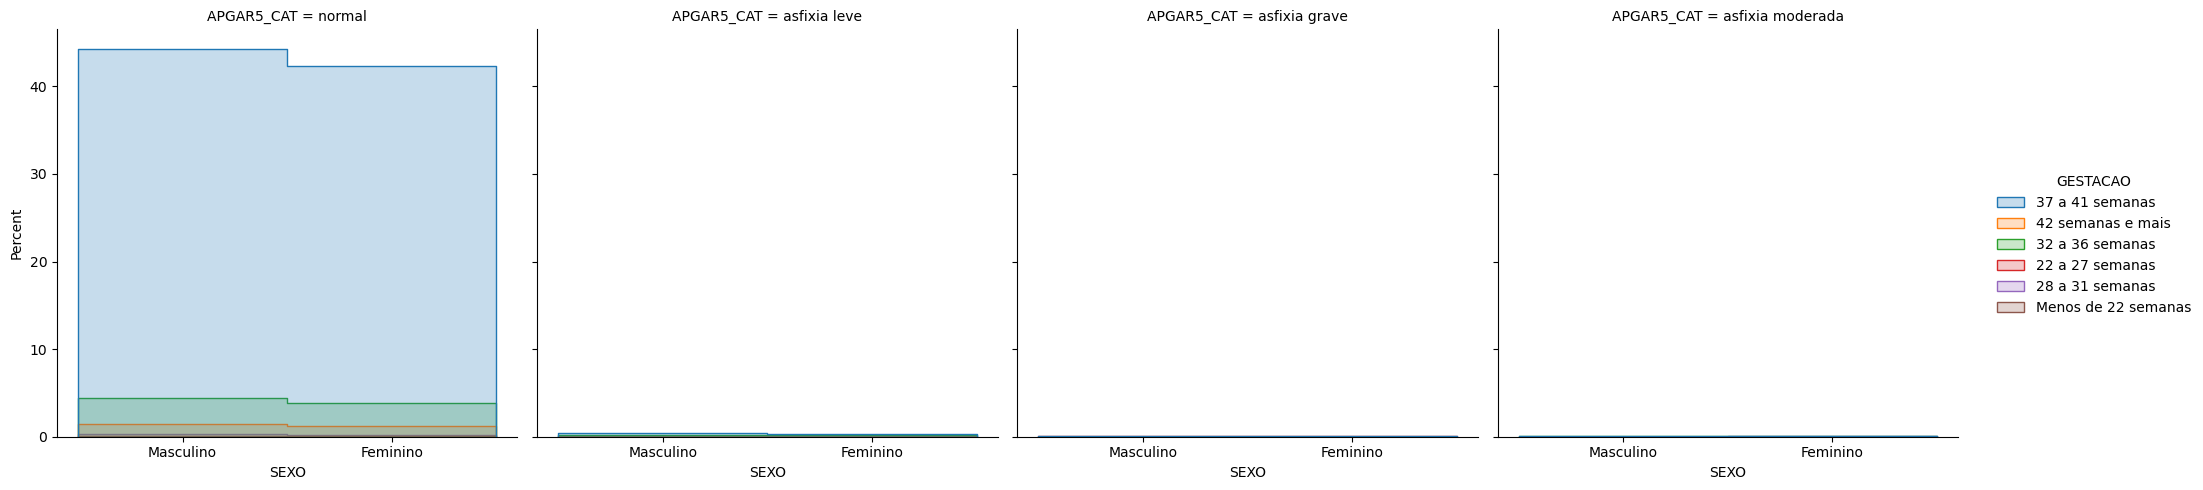

In [8]:
# Fazendo um histograma de APGAR5 por sexo para cada grupo de tempo de gestação
# Primeiro teste: 'DISPLOT'
sns.displot(data = sinasc
            ,x = 'SEXO'          # Coluna SEXO no eixo x
            ,hue = 'GESTACAO'    # Separando o APGAR5 por tempo de gestação
            ,col = 'APGAR5_CAT'  # Um gráfico por categoria de APGAR5
            ,element = 'step'    # Retirando as linhas internas do histograma
            ,stat='percent'      # Visualizando por percentual
           )

**Resultado da visualização com o Displot:** em função da grande concentração do APGAR5 na categoria normal, não é possível analisar os dados para as demais categorias pois os gráficos estão ilegíveis.

In [9]:
# Segunda tentativa: 'CATPLOT'
# Antes, precisamos ajustar o eixo y dos gráficos das categorias para a mesma escala
sinasc_apgar = pd.DataFrame(sinasc['APGAR5_CAT'].value_counts()) # Gerando DataFrame com as frequências das categorias de APGAR5_CAT
# Isolando o valor da frequência de cada categoria
total_normal = sinasc_apgar.iloc[0, 0] 
total_asfixia_leve = sinasc_apgar.iloc[1, 0]
total_asfixia_grave = sinasc_apgar.iloc[2, 0]
total_asfixia_moderada = sinasc_apgar.iloc[3, 0]

In [10]:
# Criando uma coluna 'APGAR5_PESO' de forma que a soma de cada categoria seja 1
peso_normal = 1 / total_normal
peso_asfixia_leve = 1 / total_asfixia_leve
peso_asfixia_grave = 1 / total_asfixia_grave
peso_asfixia_moderada = 1 / total_asfixia_moderada
dict_map = {
    'normal': peso_normal, 'asfixia leve': peso_asfixia_leve, 
    'asfixia grave': peso_asfixia_grave, 'asfixia moderada': peso_asfixia_moderada
}

sinasc['APGAR5_PESO'] = sinasc['APGAR5_CAT'].map(dict_map) # Utilizando a função 'map' da pandas para a categorização
sinasc.head() # Visualizando novamente o DataFrame

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_CAT,APGAR5_PESO
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal,0.000038
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal,0.000038
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal,0.000038
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal,0.000038
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal,0.000038


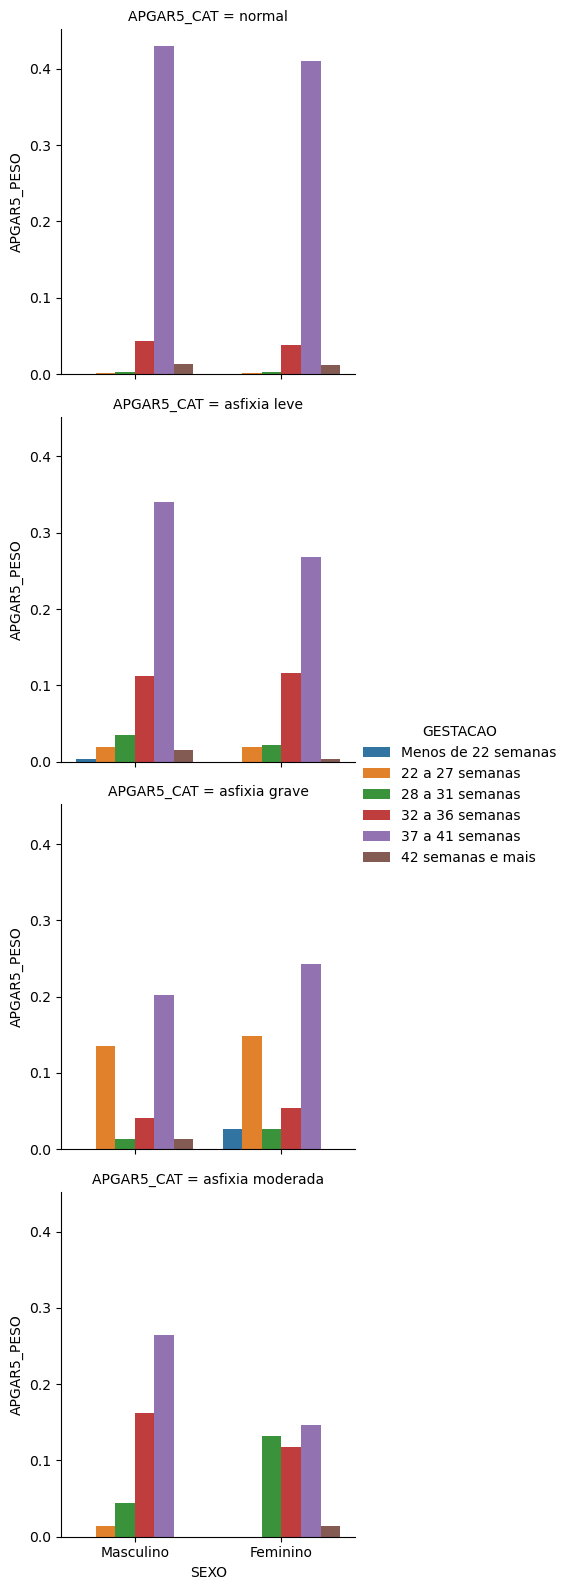

In [11]:
# Gerando o 'CATPLOT' para visualização em uma mesma escala para o eixo y
# Inicialmente vamos criar uma lista para ordenar as categorias da coluna 'GESTACAO'
lista = ['Menos de 22 semanas','22 a 27 semanas','28 a 31 semanas','32 a 36 semanas','37 a 41 semanas','42 semanas e mais']
sns.catplot(x='SEXO', y='APGAR5_PESO'
            , hue = 'GESTACAO'
            , row = 'APGAR5_CAT'
            , kind='bar'
            , estimator = sum
            , data=sinasc
            , errorbar=None
            , height= 4
            , hue_order=lista
           )

**Resultado da visualização com o Catplot:** em função da mesma escala do eixo y para todos as categorias de 'APGAR5_CAT' é possível visualizar todos os quatro gráficos de APGAR5 por sexo para cada grupo de tempo de gestação.

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [12]:
# Tabela cruzada
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5_CAT'])
# Reordenando as colunas para ajustar a legenda do gráfico
categorias = ['normal','asfixia leve','asfixia moderada','asfixia grave']
freq = freq.reindex(categorias, axis="columns")
freq

APGAR5_CAT,normal,asfixia leve,asfixia moderada,asfixia grave
GESTACAO,,,,
22 a 27 semanas,51,12,1,21
28 a 31 semanas,129,18,12,3
32 a 36 semanas,2134,73,19,8
37 a 41 semanas,22266,196,28,33
42 semanas e mais,690,6,1,1
Menos de 22 semanas,4,1,0,2


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [13]:
# Calculando os percentuais de linha
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0) * 100
freq_pctlin

APGAR5_CAT,normal,asfixia leve,asfixia moderada,asfixia grave
GESTACAO,,,,
22 a 27 semanas,60.000000,14.117647,1.176471,24.705882
28 a 31 semanas,79.629630,11.111111,7.407407,1.851852
32 a 36 semanas,95.523724,3.267681,0.850492,0.358102
37 a 41 semanas,98.858944,0.870222,0.124317,0.146517
42 semanas e mais,98.853868,0.859599,0.143266,0.143266
Menos de 22 semanas,57.142857,14.285714,0.000000,28.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

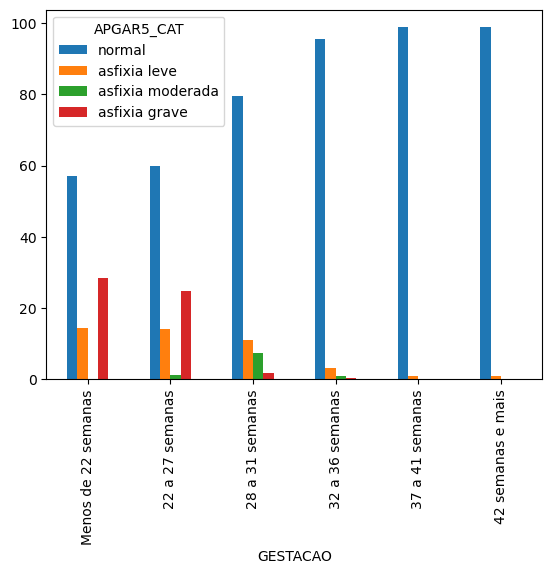

In [14]:
# Gerando um gráfico de barras com as categorias de GESTACAO ordenadas
freq_pctlin.loc[lista].plot.bar()

**Análise:** No gráfico fica visível que quanto menor o tempo de gestação, maior a probabilidade do APGAR5 indicar aumento da complicação por asfixia. E que a partir de 37 semanas a categoria 'normal' do APGAR5 chega a quase 100%, colaborando com a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

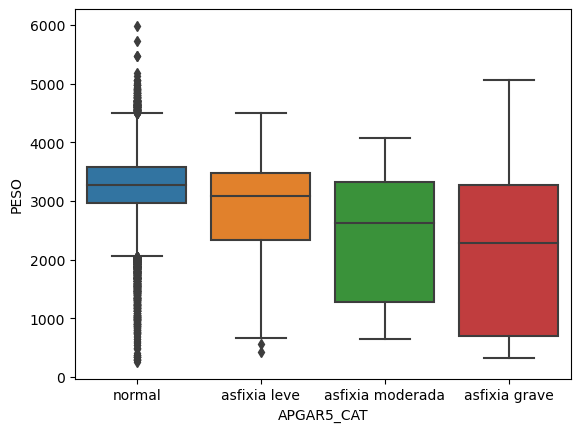

In [15]:
# Gerando um gráfico 'BOXPLOT'
ax = sns.boxplot(x="APGAR5_CAT", y="PESO", order = categorias, data=sinasc)

**Análise:** A categoria normal do APGAR5 apresenta pouca variabilidade para o peso, tendo a mediana por volta de 3.200. Conforme há aumento no grau de asfixia do APGAR5, a mediana apresenta queda, sinalizando que há relação entre o APGAR5 e o peso do bebê.